# 评价分类结果

- 回归: R-square
- 分类: 准确率 (skwed 数据存在问题)
  - 100人中有1个患病
  - 即使全部预测没有病,也有99%准确率
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032440.png)

## 混淆矩阵 (Confusion Matrix)

### 原理

- TP – True Positive：实际为男性，且判断为男性（正确）

- FN – False Negative：实际为男性，但判断为女性（错误）

- TN – True Negative：实际为女性，且判断为女性（正确）

- FP – False Positive：实际为女性，但判断为男性（错误)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032546.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032554.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032606.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032852.png)

### 自我实现

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#加载数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target == 9] = 1
y[digits.target != 9] = 0
# 数据归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)
# 逻辑回归训练数据
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9822222222222222

In [2]:
y_log_predict = log_reg.predict(X_test)


def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))


def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))


def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))


def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))


def confusion_matrix(y_true, y_predict):
    return np.array([[TN(y_true, y_predict),
                      FP(y_true, y_predict)],
                     [FN(y_true, y_predict),
                      TP(y_true, y_predict)]])


confusion_matrix(y_test, y_log_predict)

array([[404,   1],
       [  7,  38]])

### sklearn混淆矩阵(二分类)

In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[404,   1],
       [  7,  38]])

### sklearn混淆矩阵(多分类)

In [4]:
# 加载数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test_multi = train_test_split(X,
                                                          y,
                                                          test_size=0.8,
                                                          random_state=666)

standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test_multi)
y_predict_multi = log_reg.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_multi, y_predict_multi)

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 127,   2,   0,   1,   0,   0,   0,   0,  13],
       [  0,   1, 133,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 138,   0,   3,   0,   2,   5,   0],
       [  0,   3,   0,   0, 142,   0,   0,   4,   0,   1],
       [  0,   1,   1,   1,   0, 146,   1,   0,   0,   2],
       [  1,   1,   0,   0,   0,   1, 133,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   7,   1,   2,   3,   1,   0,   2, 122,   2],
       [  0,   1,   0,   6,   0,   1,   0,   1,   1, 137]])

### 可视化混淆矩阵

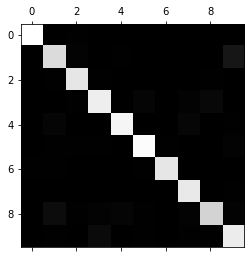

In [6]:
cfm = confusion_matrix(y_test_multi, y_predict_multi)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

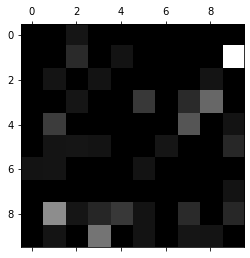

In [7]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)

plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()

## 精准率和召回率(Precision&Recall)

### 原理

- 精准率
$$Precision = \frac{{TP}}{{TP + FP}}$$
  - 例子解释,每做m次患病预测,成功率是多少
  - 可应用于股票,不保证预测出所有为1的值,但保证预测出来为1的数据尽肯能正确
- 召回率
$${\mathop{\rm Re}\nolimits} call = \frac{{TP}}{{TP + FN}}$$
  - 例子解释,真实为1的数据,我们成功预测出了多少
  - 可用于医疗,保证尽可能多的预测出为1的值,但不保证存在很多错误判断成1的值
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423033227.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423033237.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423033245.png)

### 自我实现

In [8]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0


precision_score(y_test, y_log_predict)

0.9743589743589743

In [9]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0


recall_score(y_test, y_log_predict)

0.8444444444444444

### sklearn中的实现(二分类)

In [10]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9743589743589743

In [11]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8444444444444444

### sklearn中的实现(多分类)

In [12]:
from sklearn.metrics import precision_score

precision_score(y_test_multi, y_predict_multi, average="micro")

0.9464534075104312

In [13]:
from sklearn.metrics import recall_score

recall_score(y_test_multi, y_predict_multi,average="micro")

0.9464534075104312

## Precision-Recall 曲线

- 精确率（Precision）和召回率（Recall）之间的关系用图来表达
- 他们俩的关系是「两难全」的关系。
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423033813.png)

### sklearn中的调用

- 急速开始下降时,模型变坏


(150,)
(150,)
(149,)


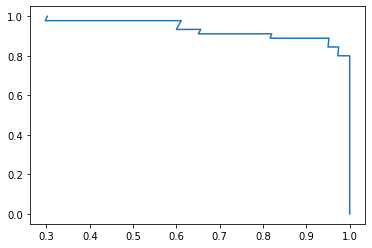

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#加载数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0
# 数据归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# PR曲线
from sklearn.metrics import precision_recall_curve

decision_scores = log_reg.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(
    y_test, decision_scores)
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)
plt.plot(precisions, recalls)
plt.show()

## F1 score

- PR曲线之间找一个平衡点，就出现了一个 F1分数
- 精准率和召回率的调和平均值
- 调和平均可以惩罚极端情况。一个具有 1.0 的精度，而召回率为 0 的分类器，这两个指标的算术平均是 0.5，但是 F1 score 会是 0
- 调和平均值,如果有一项特别高或者特别低,最终值也会低
  - 原式
$$\frac{1}{{F1}} = \frac{1}{2}\left( {\frac{1}{{\Pr ecision}} + \frac{1}{{{\mathop{\rm Re}\nolimits} call}}} \right)$$
  - 化简
$$F1 = \frac{{2 \cdot \Pr ecision \cdot {\mathop{\rm Re}\nolimits} call}}{{\Pr ecision + {\mathop{\rm Re}\nolimits} call}}$$  

### 自我实现

In [19]:
import numpy as np

def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [20]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [21]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

### sklearn中的实现(二分类)

In [22]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.9047619047619048

### sklearn中的实现(多分类)

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test_multi, y_predict_multi,average="micro")

0.9464534075104312

## 阈值(Threshod)

- 原决策边界
$${\theta ^T} \cdot {x_b} = 0$$
- 加入 threshold 的决策边界
$${\theta ^T} \cdot {x_b} = Threshold$$  
- 加入threshold,可以主动调整决策边界,从而调整精准率和召回率
![1](https://tvax4.sinaimg.cn/large/a17dfad9gy1gdez0xrlntj20g506ijs5.jpg)

### threshold演示

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#加载数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0
# 数据归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
# F1
f1_score(y_test, y_predict)

0.9047619047619048

In [25]:
# 代表sigmod后的值,也是最终判断指标
# 通过LogisticRegression下的decision_function获得
decision_scores = log_reg.decision_function(X_test)
decision_scores[:5]

array([ -9.24275126, -10.24462673,  -7.66462778, -29.19944838,
       -17.54760817])

In [26]:
print(np.min(decision_scores))
print(np.max(decision_scores))

-29.199448384400096
8.5075249340682


In [27]:
# threshold=5
y_predict_2 = np.array(decision_scores >= 5, dtype='int')
print(confusion_matrix(y_test, y_predict_2))
print(precision_score(y_test, y_predict_2))
print(recall_score(y_test, y_predict_2))

[[405   0]
 [ 37   8]]
1.0
0.17777777777777778


In [28]:
# threshold=-5
y_predict_2 = np.array(decision_scores >= -5, dtype='int')
print(confusion_matrix(y_test, y_predict_2))
print(precision_score(y_test, y_predict_2))
print(recall_score(y_test, y_predict_2))

[[348  57]
 [  1  44]]
0.43564356435643564
0.9777777777777777


### sklearn根据图选取theshold

(150,)
(150,)
(149,)


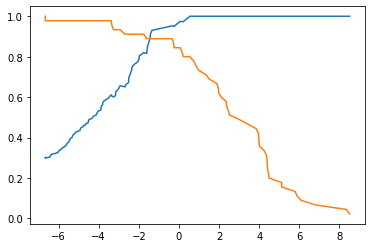

In [0]:
from sklearn.metrics import precision_recall_curve

decision_scores = log_reg.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

## ROC 曲线

### 原理

- **受试者工作特征曲线(receiver operating characteristic curve)**
- ROC 曲线也是通过遍历所有的值 来绘制整条曲线的
- TPR 越高，同时 FPR 越低（即 ROC 曲线越陡），那么模型的性能就越好
- 无论红蓝色样本比例如何改变，ROC 曲线都没有影响
- 公式
  $$TRP = \frac{{TP}}{{TP + FN}}$$
  $$FRP = \frac{{FP}}{{FP + TN}}$$  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423034108.gif)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423034156.gif)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423034206.gif)

### AUC

- 为了计算 ROC 曲线上的点，我们可以使用不同的分类阈值多次评估逻辑回归模型，但这样做效率非常低
- 有一种基于排序的高效算法可以为我们提供此类信息，这种算法称为曲线下面积（Area Under Curve）。
- 如果我们连接对角线，它的面积正好是 0.5。对角线的实际含义是：随机判断响应与不响应，正负样本覆盖率应该都是 50%，表示随机效果。 AUC = 0.5，跟随机猜测一样（例：丢铜板），模型没有预测价值。
- ROC 曲线越陡越好，所以理想值就是 1
- AUC 的一般判断标准
    - 0.5 – 0.7： 效果较低，但用于预测股票已经很不错了
    - 0.7 – 0.85： 效果一般
    - 0.85 – 0.95： 效果很好
    - 0.95 – 1： 效果非常好，但一般不太可能

### sklearn中实现ROC

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#加载数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0
# 数据归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

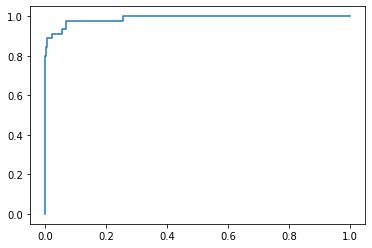

In [30]:
from sklearn.metrics import roc_curve

decision_scores = log_reg.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

plt.plot(fprs, tprs)
plt.show()

### sklearn中实现AUC

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.989190672153635

### sklearn中实现AUC(多分类)